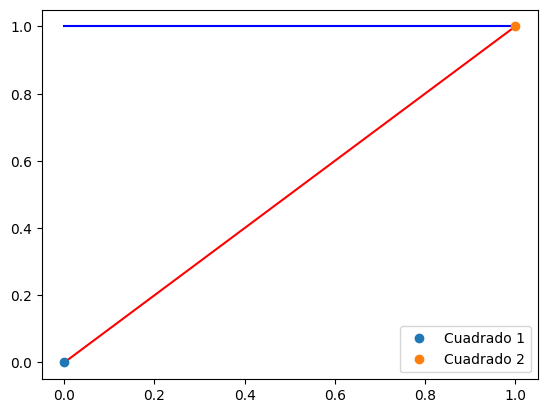

La distancia entre los cuadrados es: 1.4142135623730951


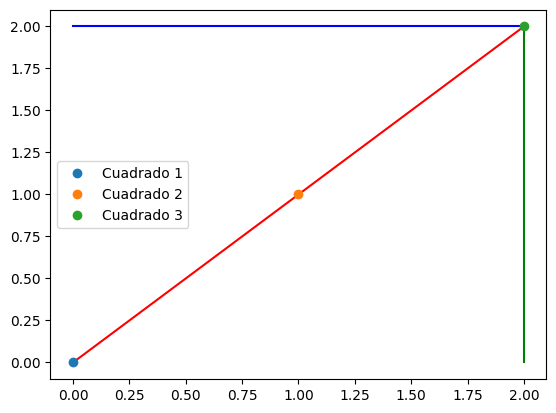

La distancia entre el cuadrado 1 y el cuadrado 2 es: 1.4142135623730951
La distancia entre el cuadrado 1 y el cuadrado 3 es: 2.8284271247461903
La distancia entre el cuadrado 2 y el cuadrado 3 es: 1.4142135623730951


In [2]:
import qiskit as q
import numpy as np
import matplotlib.pyplot as plt

# Definimos las coordenadas de los cuadrados
c1 = np.array([0, 0])
c2 = np.array([1, 1])

# Calculamos la distancia entre los cuadrados
dist = np.linalg.norm(c2 - c1)

# Graficamos los cuadrados
plt.plot([0, 1], [0, 1], 'r')
plt.plot([0, 1], [1, 1], 'b')
plt.plot(c1[0], c1[1], 'o', label="Cuadrado 1")
plt.plot(c2[0], c2[1], 'o', label="Cuadrado 2")
plt.legend()
plt.show()

# Imprimimos la distancia
print("La distancia entre los cuadrados es:", dist)
# Definimos las coordenadas de los cuadrados
c3 = np.array([2, 2])

# Calculamos la distancia entre los cuadrados
dist1 = np.linalg.norm(c2 - c1)
dist2 = np.linalg.norm(c3 - c1)
dist3 = np.linalg.norm(c3 - c2)

# Graficamos los cuadrados
plt.plot([0, 2], [0, 2], 'r')
plt.plot([0, 2], [2, 2], 'b')
plt.plot([2, 2], [2, 0], 'g')
plt.plot(c1[0], c1[1], 'o', label="Cuadrado 1")
plt.plot(c2[0], c2[1], 'o', label="Cuadrado 2")
plt.plot(c3[0], c3[1], 'o', label="Cuadrado 3")
plt.legend()
plt.show()

# Imprimimos las distancias
print("La distancia entre el cuadrado 1 y el cuadrado 2 es:", dist1)
print("La distancia entre el cuadrado 1 y el cuadrado 3 es:", dist2)
print("La distancia entre el cuadrado 2 y el cuadrado 3 es:", dist3)

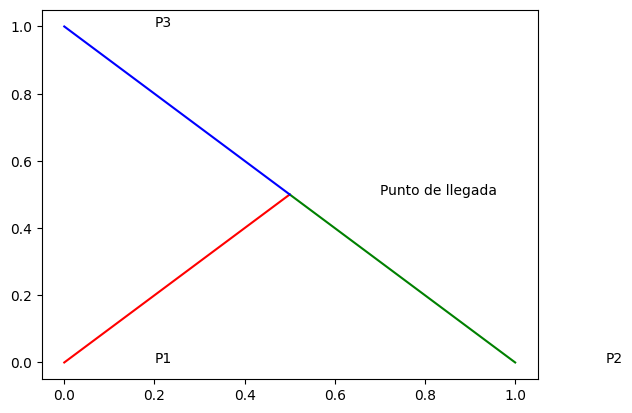

La distancia más corta es: 0.7071067811865476


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, Aer, execute

# Define los tres puntos diferentes
p1 = np.array([0, 0])
p2 = np.array([1, 0])
p3 = np.array([0, 1])

# Define el punto al que se calculará la distancia
p4 = np.array([0.5, 0.5])

# Calcula la distancia euclidiana entre cada punto y el punto al que se calculará la distancia
dist1 = np.linalg.norm(p1 - p4)
dist2 = np.linalg.norm(p2 - p4)
dist3 = np.linalg.norm(p3 - p4)

# Crea un circuito cuántico para calcular la distancia entre cada punto y el punto al que se calculará la distancia
qc = QuantumCircuit(4, 2)
qc.ry(-2 * np.arccos(np.clip(p2[0] / dist2, -1, 1)), 1)
qc.measure(0, 0)
qc.measure(1, 1)

# Ejecuta el circuito cuántico
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1000).result()

# Obtiene los resultados del circuito cuántico
counts = result.get_counts()

# Calcula la probabilidad de cada resultado
prob1 = counts['00'] / 1000
prob2 = counts.get('01', 0) / 1000
prob3 = counts.get('10', 0) / 1000

# Calcula la distancia más corta
dist_min = np.nanmin(np.dot([prob1, prob2, prob3], [dist1, dist2, dist3]))

# Crea una gráfica de los puntos
plt.plot([p1[0], p4[0]], [p1[1], p4[1]], 'r')
plt.plot([p2[0], p4[0]], [p2[1], p4[1]], 'g')
plt.plot([p3[0], p4[0]], [p3[1], p4[1]], 'b')
plt.plot([p4[0], p4[0]], [p4[1], p4[1]], 'k')
plt.annotate('P1', p1, (p1[0] + 0.2, p1[1]))
plt.annotate('P2', p2, (p2[0] + 0.2, p2[1]))
plt.annotate('P3', p3, (p3[0] + 0.2, p3[1]))
plt.annotate('Punto de llegada', p4, (p4[0] + 0.2, p4[1]))
plt.show()

print("La distancia más corta es:", dist_min)

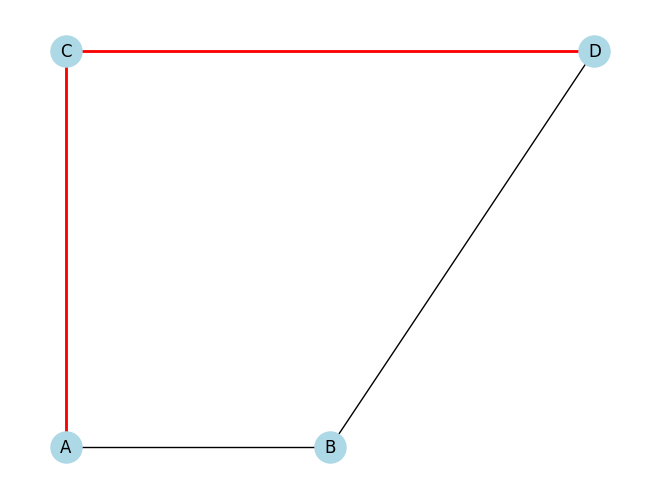

La distancia más corta es: 2.5


In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo de ejemplo
G = nx.Graph()

# Agregar nodos (ubicaciones)
G.add_node("A", pos=(0, 0))
G.add_node("B", pos=(1, 0))
G.add_node("C", pos=(0, 1))
G.add_node("D", pos=(2, 1))

# Agregar aristas (conexiones)
G.add_edge("A", "B", weight=1.0)
G.add_edge("A", "C", weight=1.0)
G.add_edge("B", "D", weight=2.0)
G.add_edge("C", "D", weight=1.5)

# Definir el punto de inicio y el punto de destino
start = "A"
end = "D"

# Calcular el camino más corto
shortest_path = nx.shortest_path(G, source=start, target=end, weight="weight")

# Dibujar la ciudad con el camino más corto
pos = nx.get_node_attributes(G, "pos")
nx.draw(G, pos, with_labels=True, node_size=500, node_color="lightblue")
path_edges = list(zip(shortest_path, shortest_path[1:]))
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)

plt.show()

# Calcular la distancia total
total_distance = sum(G[path_edges[i][0]][path_edges[i][1]]["weight"] for i in range(len(path_edges)))
print("La distancia más corta es:", total_distance)